THUẬT TOÁN K- MEANS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Bước 1: Đọc dữ liệu và chọn cột cần thiết
file_name = '/content/drive/MyDrive/ĐẠI HỌC/NĂM 3/OLAP/healthcare_dataset.csv'  # Thay bằng tên file của bạn
dataset = pd.read_csv(file_name)

# Chọn các cột đầu vào (ví dụ: Age, Billing Amount, Medical Condition)
data_cleaned = dataset[['Age', 'Billing Amount', 'Medical Condition']]

In [6]:

# Bước 2: Tiền xử lý dữ liệu
# Mã hóa cột 'Medical Condition' (chuyển thành số)
label_encoder = LabelEncoder()
data_cleaned['Medical Condition'] = label_encoder.fit_transform(data_cleaned['Medical Condition'])

# Điền giá trị thiếu (nếu có)
data_cleaned.fillna(data_cleaned.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

<ipython-input-6-93340d519191>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Medical Condition'] = label_encoder.fit_transform(data_cleaned['Medical Condition'])
<ipython-input-6-93340d519191>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.fillna(data_cleaned.mean(), inplace=True)


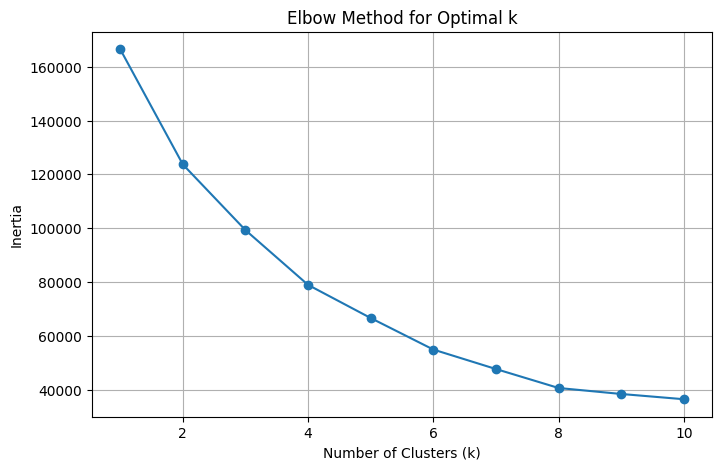

In [7]:

# Bước 3: Xác định số cụm bằng Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

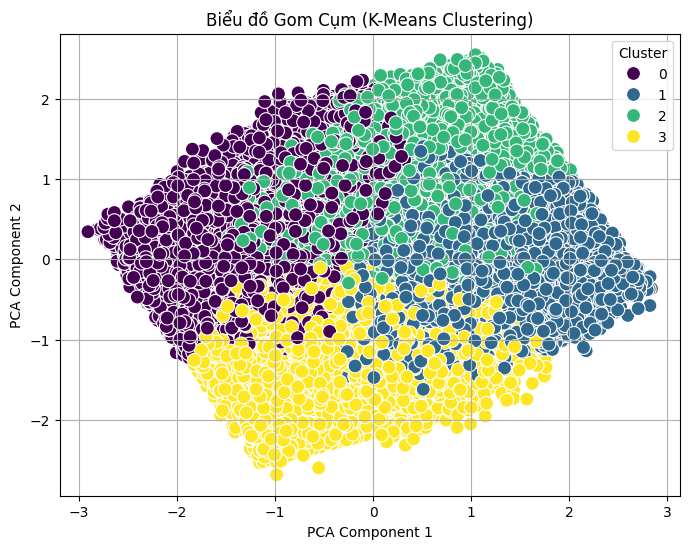

In [8]:
 #Bước 4: Thực hiện K-Means Clustering
# Chọn số cụm dựa trên Elbow Method (ví dụ: k=3)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Thêm cột 'Cluster' vào dataset gốc
dataset['Cluster'] = clusters

# Bước 5: Vẽ sơ đồ gom cụm
# Giảm chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Vẽ biểu đồ các cụm
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_2d[:, 0],
    y=data_2d[:, 1],
    hue=dataset['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Biểu đồ Gom Cụm (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.show()

In [9]:

# Bước 5 : Xuất dữ liệu ra file Excel
output_file = 'healthcare_clustered_output.xlsx'
dataset.to_excel(output_file, index=False)

THUẬT TOÁN DECISION TREE & RANDOM FOREST

In [10]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# ----- 1. Xử lý dữ liệu -----

# Đọc dataset
file_name = '/content/drive/MyDrive/ĐẠI HỌC/NĂM 3/OLAP/healthcare_dataset.csv'
dataset = pd.read_csv(file_name)

# Chuyển đổi các cột chuỗi sang dạng số bằng Label Encoding
label_columns = [
   'Blood Type',  'Doctor',
    'Hospital'
]

le = LabelEncoder()
for col in label_columns:
    dataset[col] = le.fit_transform(dataset[col])

# Loại bỏ các cột không cần thiết
dataset = dataset.drop(columns=['Name', 'Date of Admission', 'Discharge Date','Test Results', 'Medication','Admission Type', 'Insurance Provider', 'Medication','Gender' ])

# Tách dữ liệu thành X (các thuộc tính đầu vào) và y (biến mục tiêu)
X = dataset.drop(columns=['Billing Amount'])  # Thuộc tính đầu vào
y = dataset['Billing Amount']  # Biến mục tiêu

# Nếu còn cột dạng object, sử dụng LabelEncoder để mã hóa
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])

# Chuẩn hóa dữ liệu số
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Chia tập dữ liệu thành training set và testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Chuyển đổi Billing Amount thành nhãn phân loại
y_train = (y_train > y_train.median()).astype(int)
y_test = (y_test > y_test.median()).astype(int)


In [12]:
# ----- 2. Huấn luyện mô hình -----

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# ----- 3. Đánh giá mô hình -----

# Dự đoán trên tập kiểm tra
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Đánh giá Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Đánh giá Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Decision Tree Accuracy: 0.5018018018018018
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62      8325
           1       0.51      0.18      0.26      8325

    accuracy                           0.50     16650
   macro avg       0.50      0.50      0.44     16650
weighted avg       0.50      0.50      0.44     16650


Random Forest Accuracy: 0.5693093093093093
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      8325
           1       0.57      0.54      0.56      8325

    accuracy                           0.57     16650
   macro avg       0.57      0.57      0.57     16650
weighted avg       0.57      0.57      0.57     16650



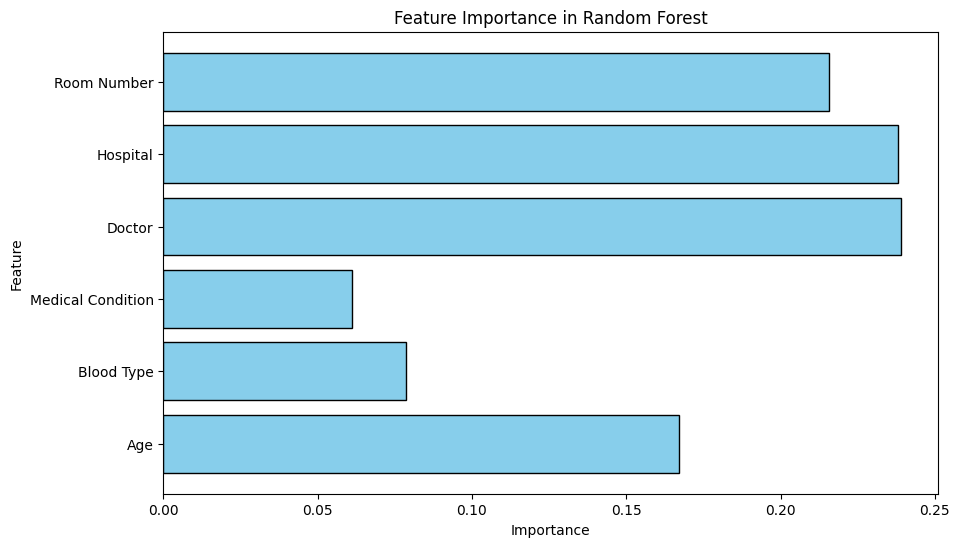

In [14]:
# ----- 4. Phân tích Feature Importance -----

# Tầm quan trọng của thuộc tính với Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

# Vẽ biểu đồ tầm quan trọng của thuộc tính
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()


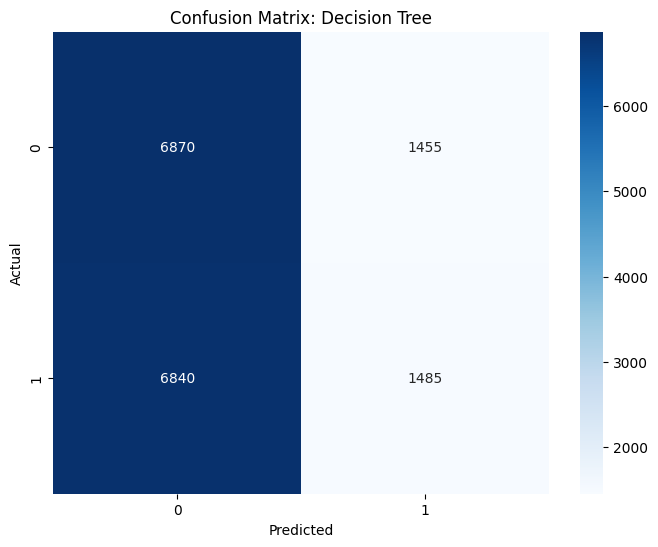

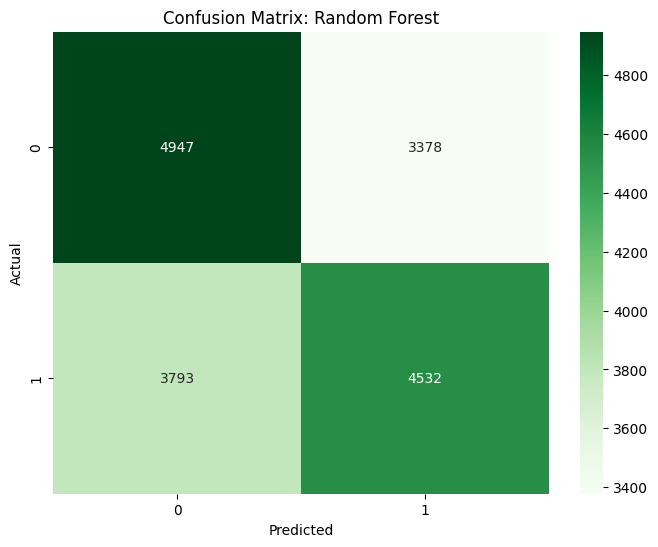

In [15]:
# ----- 5. Trực quan hóa Ma trận Nhầm Lẫn -----

# Ma trận nhầm lẫn cho Decision Tree
conf_matrix_dt = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Ma trận nhầm lẫn cho Random Forest
conf_matrix_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
!pip install graphviz
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


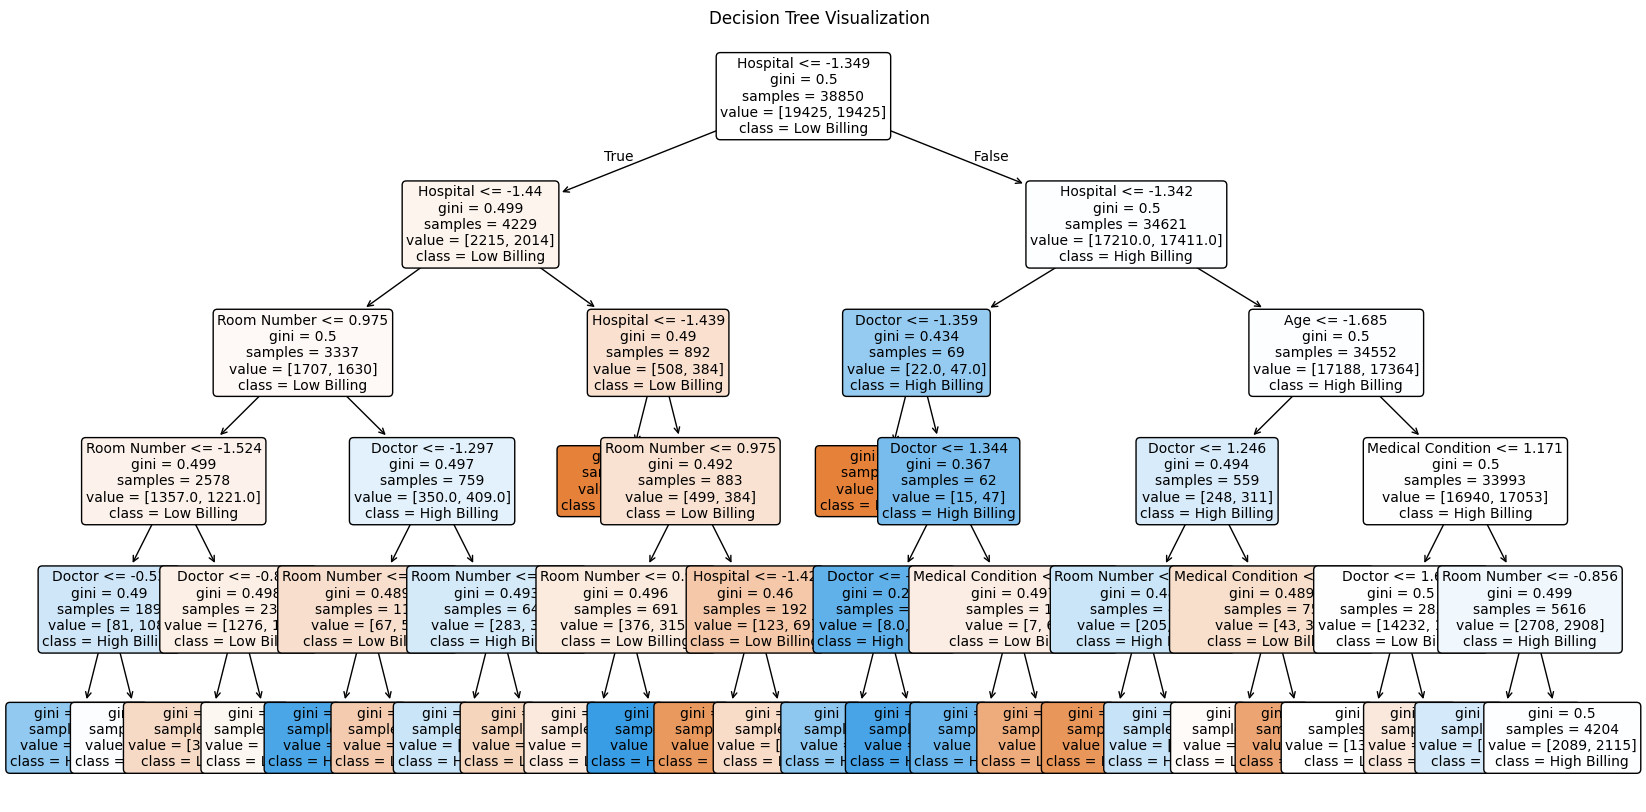

In [18]:
from sklearn import tree
import matplotlib.pyplot as plt

# Trực quan hóa Decision Tree bằng cách sử dụng plot_tree
plt.figure(figsize=(20, 10))  # Tùy chỉnh kích thước hình vẽ
tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["Low Billing", "High Billing"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()
